#3 - Notebook to download & clean the supplementary dataset (Guardian)




---

### **This notebook primarily contains code to download the supplemental dataset (Guardian) that is hosted on Kaggle and clean it.**

* *Link to the dataset:* https://www.kaggle.com/datasets/sameedhayat/guardian-news-dataset

* *Author:* **Sameed Hayat**
* We are using v1 of the dataset that was uploaded on 2nd June 2019.



---
### **Some basic information regarding the dataset:**

* We use a supplemental dataset because our primary dataset only contains real news stories from a single source (Reuters), which might lead to model overfitting despite our efforts to not do so.

* The dataset was gathered by Sameed Hayat from the news website, The Guardian.

* It contains over 52,000 real news articles on several topics, but the only ones used here are from the politics section (contains approx. 12,650 articles).

---

For instructions on installing the Kaggle API and getting the API keyfile, please refer to [this link.](https://medium.com/unpackai/how-to-use-kaggle-datasets-in-google-colab-f9b2e4b5767c)


**Note: Without installing the Kaggle API and/or loading the API keyfile, you will not be able to download the dataset!**


In [ ]:
# Installs Kaggle API.
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/



# Importing libraries and defining constants

In [ ]:
# Imports library necessary for mounting Google Drive.
from google.colab import drive
# Mounts Google Drive.
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Copies the model helper function python program from Google Drive to Colab Storage for use in this notebook.
!cp "drive/MyDrive/Fake News Classifier/Helper Functions/model_helperfunctions.py" .

In [ ]:
# Imports all the libraries required for the notebook to run.
import os
import zipfile
import pandas as pd
import numpy as np
import model_helperfunctions
import matplotlib.pyplot as plt
import nltk
from re import search
%matplotlib inline

In [ ]:
# Sets the path for Kaggle's configuration file as well as the data directory.
DATA_PATH = DATA_PATH = "/content/drive/MyDrive/Data/"
os.environ['KAGGLE_CONFIG_DIR'] = DATA_PATH

# Please update the below three constants if the original dataset on Kaggle changes.
DATA_ARCHIVE = 'guardian-news-dataset.zip'
DATA_FILE = 'combined_filtered.csv'
KAGGLE_DATA_LOCATION = 'sameedhayat/guardian-news-dataset'

CLEAN_DATA_FILE_NAME = 'guardian_newsdataset_cleaned.csv'
SAVE_FILE = True

# Download the dataset

In [ ]:
try: 
    os.mkdir(DATA_PATH)
    print('The directory to store the Guardian dataset was just created. Please make sure to put the Kaggle API Keyfile (kaggle.json) in this folder before proceeding further.')
except FileExistsError:
    print('The directory to store datasets already exists. No new directory will be created.')
    pass

The directory to store datasets already exists. No new directory will be created.


In [ ]:
# Downloads the Guardian dataset from Kaggle if it doesn't already exist (Assuming Kaggle API has been installed and API keyfile (kaggle.json) is present).
if not os.path.exists(DATA_PATH + DATA_ARCHIVE):
    !kaggle datasets download -d $KAGGLE_DATA_LOCATION -p $DATA_PATH

 93% 193M/207M [00:01<00:00, 146MB/s]
100% 207M/207M [00:01<00:00, 140MB/s]


In [ ]:
# Extracts the ZIP file if the dataset was freshly downloaded from Kaggle. If already present, no action is taken.
if not os.path.exists(DATA_PATH + DATA_FILE):
    with zipfile.ZipFile(DATA_PATH + DATA_ARCHIVE, 'r') as zip_ref:
        zip_ref.extractall(path=DATA_PATH)

In [ ]:
# Lists out the files present in the dataset folder.
os.listdir(DATA_PATH)

['kaggle.json',
 'fake-and-real-news-dataset.zip',
 'Fake.csv',
 'True.csv',
 'kaggle_newsdataset_cleaned.csv',
 'kaggle_newsdataset_preprocessed.csv',
 'guardian-news-dataset.zip',
 'combined_filtered.csv']

# Load the dataset

In [ ]:
df = pd.read_csv(DATA_PATH + DATA_FILE)

In [ ]:
df.head()

,Unnamed: 0,apiUrl,fields.bodyText,id,isHosted,pillarId,pillarName,sectionId,sectionName,type,webPublicationDate,webTitle,webUrl,filtered_bodyText
0,0,https://content.guardianapis.com/technology/20...,A day after Barack Obama announced tough new s...,technology/2016/dec/31/russia-hacking-malware-...,False,pillar/news,News,technology,Technology,article,2016-12-31T16:34:02Z,US-Russia tensions rise as malware found at Ve...,https://www.theguardian.com/technology/2016/de...,"['day', 'barack', 'obama', 'announced', 'tough..."
1,1,https://content.guardianapis.com/technology/20...,A journalist was temporarily banned from Faceb...,technology/2016/dec/30/facebook-temporary-ban-...,False,pillar/news,News,technology,Technology,article,2016-12-30T21:22:06Z,Facebook temporarily bans author after he call...,https://www.theguardian.com/technology/2016/de...,"['journalist', 'temporarily', 'banned', 'faceb..."
2,2,https://content.guardianapis.com/technology/20...,Technology? Bah humbug: “I think we ought to g...,technology/2016/dec/30/donald-trump-technology...,False,pillar/news,News,technology,Technology,article,2016-12-30T08:30:28Z,Donald Trump is technology's befuddled (but da...,https://www.theguardian.com/technology/2016/de...,"['technology', 'bah', 'humbug', 'think', 'ough..."
3,3,https://content.guardianapis.com/technology/20...,While there were some good things in technolog...,technology/2016/dec/30/detonating-devices-and-...,False,pillar/news,News,technology,Technology,article,2016-12-30T07:00:26Z,Exploding phones and Snapchat clones: the bigg...,https://www.theguardian.com/technology/2016/de...,"['good', 'things', 'technology', 'released', '..."
4,4,https://content.guardianapis.com/technology/20...,The US Department of Homeland Security (DHS) a...,technology/2016/dec/29/fbi-dhs-russian-hacking...,False,pillar/news,News,technology,Technology,article,2016-12-29T22:19:53Z,FBI and Homeland Security detail Russian hacki...,https://www.theguardian.com/technology/2016/de...,"['us', 'department', 'homeland', 'security', '..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52900 entries, 0 to 52899
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          52900 non-null  int64 
 1   apiUrl              52900 non-null  object
 2   fields.bodyText     52470 non-null  object
 3   id                  52900 non-null  object
 4   isHosted            52900 non-null  bool  
 5   pillarId            52900 non-null  object
 6   pillarName          52900 non-null  object
 7   sectionId           52900 non-null  object
 8   sectionName         52900 non-null  object
 9   type                52900 non-null  object
 10  webPublicationDate  52900 non-null  object
 11  webTitle            52900 non-null  object
 12  webUrl              52900 non-null  object
 13  filtered_bodyText   52900 non-null  object
dtypes: bool(1), int64(1), object(12)
memory usage: 5.3+ MB


# Filtering the data

For the model we have in mind, only the political stories are relevant (i.e. similar to the ones we already have in the other dataset). 

Hence, the rest should be filtered out.

In [ ]:
df.sectionName.value_counts()

Sport         20650
Politics      12650
Business      12000
Technology     5050
Culture        2550
Name: sectionName, dtype: int64

In [ ]:
df_politics = df[df.sectionName == 'Politics']

In [ ]:
df_politics.head()

,Unnamed: 0,apiUrl,fields.bodyText,id,isHosted,pillarId,pillarName,sectionId,sectionName,type,webPublicationDate,webTitle,webUrl,filtered_bodyText
5050,0,https://content.guardianapis.com/politics/2016...,Theresa May has used her new year message to r...,politics/2016/dec/31/theresa-may-new-year-mess...,False,pillar/news,News,politics,Politics,article,2016-12-31T22:00:39Z,Theresa May’s new year message: I’ll fight re...,https://www.theguardian.com/politics/2016/dec/...,"['theresa', 'may', 'used', 'new', 'year', 'mes..."
5051,1,https://content.guardianapis.com/politics/2016...,After a year of seismic shocks comes the prote...,politics/2016/dec/31/donald-trump-victory-prom...,False,pillar/news,News,politics,Politics,article,2016-12-31T20:43:09Z,Donald Trump victory sparks global women’s rig...,https://www.theguardian.com/politics/2016/dec/...,"['year', 'seismic', 'shocks', 'comes', 'protes..."
5052,2,https://content.guardianapis.com/politics/2016...,"I am full of admiration for Phil Scraton, who ...",politics/2016/dec/30/family-chords-and-discord,False,pillar/news,News,politics,Politics,article,2016-12-30T17:12:20Z,Family chords and discord | Brief letters,https://www.theguardian.com/politics/2016/dec/...,"['full', 'admiration', 'phil', 'scraton', 'ref..."
5053,3,https://content.guardianapis.com/politics/2016...,The Tory chairman of the Commons foreign affai...,politics/2016/dec/30/tory-mp-crispin-blunt-que...,False,pillar/news,News,politics,Politics,article,2016-12-30T15:20:46Z,Tory MP Crispin Blunt questions PM's criticism...,https://www.theguardian.com/politics/2016/dec/...,"['tory', 'chairman', 'commons', 'foreign', 'af..."
5054,4,https://content.guardianapis.com/politics/2016...,Politician of the year – Nigel Farage We weren...,politics/2016/dec/30/man-of-2016-nigel-farage-...,False,pillar/news,News,politics,Politics,article,2016-12-30T14:29:28Z,Man of 2016? Nigel Farage – my alternative New...,https://www.theguardian.com/politics/2016/dec/...,"['politician', 'year', 'nigel', 'farage', 'ove..."


The relevant fields are ['fields.bodyText', 'webTitle']

In [ ]:
df_text_title = df_politics[['fields.bodyText', 'webTitle']]

In [ ]:
df_text_title.head()

,fields.bodyText,webTitle
5050,Theresa May has used her new year message to r...,Theresa May’s new year message: I’ll fight re...
5051,After a year of seismic shocks comes the prote...,Donald Trump victory sparks global women’s rig...
5052,"I am full of admiration for Phil Scraton, who ...",Family chords and discord | Brief letters
5053,The Tory chairman of the Commons foreign affai...,Tory MP Crispin Blunt questions PM's criticism...
5054,Politician of the year – Nigel Farage We weren...,Man of 2016? Nigel Farage – my alternative New...


Any rows that are missing data must be removed (here, some stories are missing the text).

In [ ]:
df_clean = df_text_title.dropna()

# Review title capitalization

The original dataset had very little overlap between true and fake news when looking at percent of capital letters in the title.  It can be said this metric doesn't generalize well. The distribution is checked in this dataset below for good measure.

In [ ]:
def show_hist_for_col(df, column, title):
    # Helper function that display a histogram for a column in a dataframe, splitting the data by label.
    plt.figure(figsize=(16,8))
    df[column].hist()
    plt.title(title)
    plt.show()

In [ ]:
df_clean['caps_in_title'] = df_clean['webTitle'].apply(lambda title: sum(1 for char in title if char.isupper()))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_clean['title_len'] = df_clean['webTitle'].apply(len)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_clean['norm_caps_in_title'] = df_clean['caps_in_title'] / df_clean['title_len']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


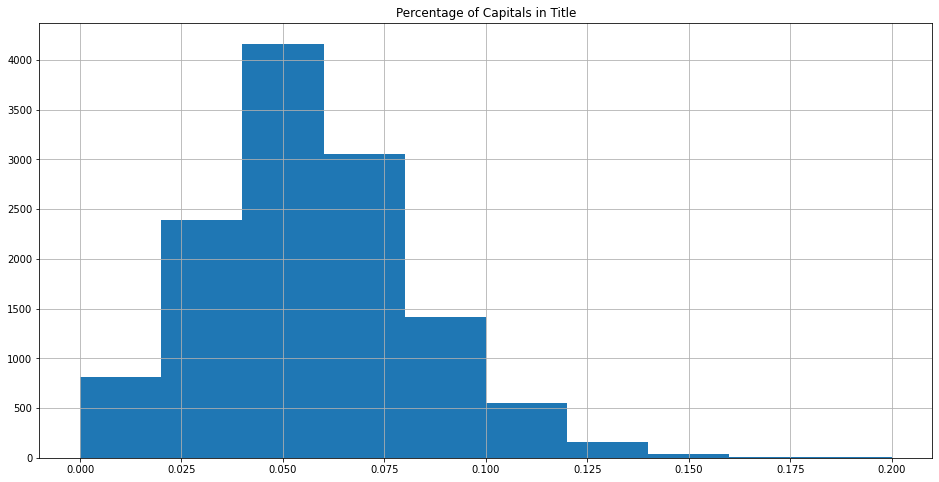

In [ ]:
show_hist_for_col(df_clean, 'norm_caps_in_title', 'Percentage of Capitals in Title')

The percentage of capitals in the titles here do overlap with the true stories from the original dataset, but that does not mean that the heuristic would generalize.

In [ ]:
# remove the columns relating to the number of capitals in the title
df_clean.drop(['caps_in_title', 'title_len', 'norm_caps_in_title'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# Tokenizing & normalizing the title and text

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df_clean['tt_tokens'] = df_clean.apply(lambda row: model_helperfunctions.tokenize_and_normalize_title_and_text(row['webTitle'],
                                                                                          row['fields.bodyText']), axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_clean.head()

,fields.bodyText,webTitle,tt_tokens
5050,Theresa May has used her new year message to r...,Theresa May’s new year message: I’ll fight re...,"[theresa, new, year, message, i, ll, fight, re..."
5051,After a year of seismic shocks comes the prote...,Donald Trump victory sparks global women’s rig...,"[donald, trump, victory, sparks, global, women..."
5052,"I am full of admiration for Phil Scraton, who ...",Family chords and discord | Brief letters,"[family, chords, and, discord, brief, letters,..."
5053,The Tory chairman of the Commons foreign affai...,Tory MP Crispin Blunt questions PM's criticism...,"[tory, MP, crispin, blunt, questions, pm, crit..."
5054,Politician of the year – Nigel Farage We weren...,Man of 2016? Nigel Farage – my alternative New...,"[man, of, nigel, farage, my, alternative, new,..."


# Save the final dataset

In [ ]:
if SAVE_FILE:
    df_clean.to_csv(DATA_PATH + CLEAN_DATA_FILE_NAME, index=False)